In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [4]:
!pip install sdv

In [5]:
import sdv

In [6]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [7]:
metadata.detect_from_dataframe(df)

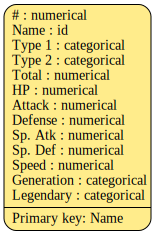

In [8]:
metadata.visualize()

In [9]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata,epochs=1000)
synthesizer.fit(df)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:81: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [10]:
synthetic_data = synthesizer.sample(num_rows=len(df))
synthetic_data.sample(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
778,221,sdv-id-778,Fire,Dark,360,93,82,139,103,76,98,3,True
50,638,sdv-id-50,Flying,NaN,180,22,64,54,63,47,67,5,False


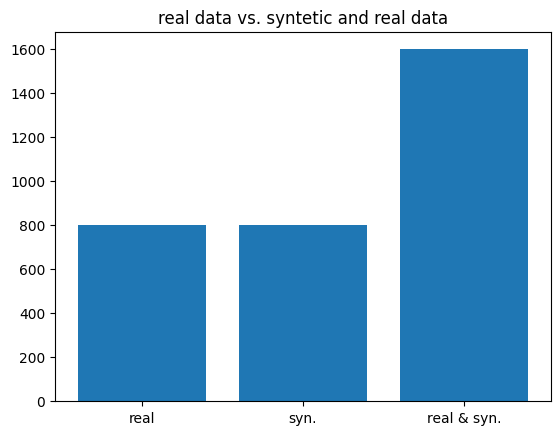

In [11]:
from matplotlib import pyplot as plt
#import seaborn as sns
#df.groupby('Legendary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.bar(["real","syn.","real & syn."],[len(df),len(synthetic_data),len(df)+len(synthetic_data)])
plt.title("real data vs. syntetic and real data");

In [12]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 614.98it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 140.49it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [13]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 399.86it/s]|
Column Shapes Score: 81.52%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:01<00:00, 50.68it/s]|
Column Pair Trends Score: 75.59%

Overall Score (Average): 78.56%



In [14]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,#,KSComplement,0.800000
1,Type 1,TVComplement,0.842500
2,Type 2,TVComplement,0.931666
3,Total,KSComplement,0.857500
4,HP,KSComplement,0.811250
5,Attack,KSComplement,0.752500
6,Defense,KSComplement,0.770000
7,Sp. Atk,KSComplement,0.743750
8,Sp. Def,KSComplement,0.825000
9,Speed,KSComplement,0.676250


In [15]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Generation',
    metadata=metadata
)

fig.show()

In [16]:
synthetic_data.to_csv("syn.csv")